In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
df_re=pd.read_csv("C:/PATRICIA/Ironhack/Projects/PROJECT-2/PROJECT-II/Clean _databases/df_re.csv")
rare_earth_df=pd.read_csv("C:/PATRICIA/Ironhack/Projects/PROJECT-2/PROJECT-II/Clean _databases/Rare_earth_df.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_re.sample()

,Unnamed: 0,Project No.,Deposit No.,Company Name,Project Name,Location,Continent,"Status (2022), 1: Exploration/ Define resource; 2: Feasibility/ Pre-feasibility; 3: Construction; 4: Production; S: Suspending mining; T: Test of Metallurgical; D: Development licence; N: Not Use",Deposit type,"Resource (*10^4 t, REO, Total)",Grade (wt. %),La2O3,Ce2O3,Pr6O11,Nd2O3,Sm2O3,Eu2O3,Gd2O3,Tb4O7,Dy2O3,Ho2O3,Er2O3,Tm2O3,Yb2O3,Lu2O3,Y2O3,HREE percentage,REE pattern Ref.,Project and status Ref.,Deposit type Ref.,Resource and grade Ref.,Unnamed: 30
7,7,8,8.0,NaN,Longonjo,"Longonjo, Angola",Africa,"1, 3(2021), 4(2022)",Carbonatite,447.0,1.43,23.93,45.86,4.94,17.16,2.48,0.58,1.23,0.13,0.6,0.09,0.21,0.02,0.11,0.02,2.63,5.04,"Preliminary Feasibility Study, 2019.11.15","Pensana Rare Earths Plc, LSE Admission July 20...","Pensana Rare Earths Plc, LSE Admission July 20...","Pensana Plc, interim results for the six month...",NaN


In [5]:
rare_earth_df.sample()

,Unnamed: 0,name,units,average_price,price_range,date
5,5,Neodymium_Oxide,USD/mt,"72,998.8","72,720.18-73,277.42","Oct 27, 2023"


***MATCHING TABLES PARAMETERS***
In order to be able to carry on calculations and easy undertanding we showld use same nomenclature in both databases, that is:


    -use same denominations for REE names
    -use same units

In [6]:
#changing names of REO (Rare Earth Oxides):
file_names_df_re = df_re.columns.tolist()
file_names_df_re

['Unnamed: 0',
 'Project No.',
 'Deposit No.',
 'Company Name',
 'Project Name',
 'Location',
 'Continent',
 ' Status (2022), 1: Exploration/ Define resource; 2: Feasibility/ Pre-feasibility; 3: Construction; 4: Production; S: Suspending mining; T: Test of Metallurgical; D: Development licence; N: Not Use',
 'Deposit type',
 'Resource (*10^4 t, REO, Total)',
 'Grade (wt. %)',
 'La2O3',
 'Ce2O3',
 'Pr6O11',
 'Nd2O3',
 'Sm2O3',
 'Eu2O3',
 'Gd2O3',
 'Tb4O7',
 'Dy2O3',
 'Ho2O3',
 'Er2O3',
 'Tm2O3',
 'Yb2O3',
 'Lu2O3',
 'Y2O3',
 'HREE percentage',
 'REE pattern Ref.',
 'Project and status Ref.',
 'Deposit type Ref.',
 'Resource and grade Ref.',
 'Unnamed: 30']

In [7]:
rare_earth_df_file_names = rare_earth_df['name'].tolist()
rare_earth_df_file_names

['Lanthanum_Oxide',
 'High_Purity_lanthanum_Oxide',
 'Cerium_Oxide',
 'High_Purity_Cerium_Oxide',
 'Praseodymium_Oxide',
 'Neodymium_Oxide',
 'Samarium_Oxide',
 'Europium_Oxide',
 'Gadolinium_Oxide',
 'High_purity_gadolinium_oxide',
 'Terbium_Oxide',
 'Dysprosium_Oxide',
 'Erbium_Oxide',
 'Yttrium_Oxide',
 'Praseodymium-neodymium_oxide',
 'Holmium_Oxide',
 'Ytterbium_oxide',
 'Lutetium_oxide',
 'Scandium_oxide']

In [8]:
#create a dictionary with the names we want to change:
names_dcit={'La2O3':'Lanthanum_Oxide', 'Ce2O3':'Cerium_Oxide','Pr6O11':'Praseodymium_Oxide','Nd2O3':'Neodymium_Oxide',
 'Sm2O3':'Samarium_Oxide', 'Eu2O3':'Europium_Oxide', 'Gd2O3':'Gadolinium_Oxide', 'Tb4O7':'Terbium_Oxide',
 'Dy2O3':'Dysprosium_Oxide', 'Ho2O3': 'Holmium_Oxide', 'Er2O3':'Erbium_Oxide', 'Tm2O3':'Thulium_oxide', 
'Yb2O3':'Ytterbium_oxide', 'Lu2O3':'Lutetium_oxide', 'Y2O3':'Yttrium_Oxide'}

In [9]:
def change_column_names(df,dic):
    df.rename(columns = names_dcit, inplace=True)
    return df

In [52]:
df_re =change_column_names(df_re, names_dcit)
#we export this table with a new name
df_re_names =df_re
df_re_names.to_csv("C:/PATRICIA/Ironhack/Projects/PROJECT-2/PROJECT-II/df_re_names")

status of the project could be an interesting column to include in the analysis but, when checking its values it is
not relyabe as it is not indicating the status today but, in many cases, the status in the future so we drop this column.


In [11]:
df_re=df_re.drop(columns=[' Status (2022), 1: Exploration/ Define resource; 2: Feasibility/ Pre-feasibility; 3: Construction; 4: Production; S: Suspending mining; T: Test of Metallurgical; D: Development licence; N: Not Use'])

In [12]:
rare_earth_df.head(15)

,Unnamed: 0,name,units,average_price,price_range,date
0,0,Lanthanum_Oxide,USD/mt,599.04,571.17-626.9,"Oct 27, 2023"
1,1,High_Purity_lanthanum_Oxide,USD/mt,"2,646.9","2,507.59-2,786.21","Oct 27, 2023"
2,2,Cerium_Oxide,USD/mt,696.55,682.62-710.48,"Oct 27, 2023"
3,3,High_Purity_Cerium_Oxide,USD/mt,"2,925.52","2,786.21-3,064.84","Oct 27, 2023"
4,4,Praseodymium_Oxide,USD/mt,"72,789.84","72,441.56-73,138.11","Oct 27, 2023"
5,5,Neodymium_Oxide,USD/mt,"72,998.8","72,720.18-73,277.42","Oct 27, 2023"
6,6,Samarium_Oxide,USD/mt,"2,089.66","1,950.35-2,228.97","Oct 27, 2023"
7,7,Europium_Oxide,USD/kg,27.17,26.47-27.86,"Oct 27, 2023"
8,8,Gadolinium_Oxide,USD/mt,"38,171.13","37,892.51-38,449.75","Oct 27, 2023"
9,9,High_purity_gadolinium_oxide,USD/mt,"41,096.65","40,400.1-41,793.21","Oct 27, 2023"


In [13]:
#we also drop undesired colunns from the other database
rare_earth_df=rare_earth_df.drop(columns=["Unnamed: 0",'price_range'])

In [14]:
rare_earth_df.head(15)

,name,units,average_price,date
0,Lanthanum_Oxide,USD/mt,599.04,"Oct 27, 2023"
1,High_Purity_lanthanum_Oxide,USD/mt,"2,646.9","Oct 27, 2023"
2,Cerium_Oxide,USD/mt,696.55,"Oct 27, 2023"
3,High_Purity_Cerium_Oxide,USD/mt,"2,925.52","Oct 27, 2023"
4,Praseodymium_Oxide,USD/mt,"72,789.84","Oct 27, 2023"
5,Neodymium_Oxide,USD/mt,"72,998.8","Oct 27, 2023"
6,Samarium_Oxide,USD/mt,"2,089.66","Oct 27, 2023"
7,Europium_Oxide,USD/kg,27.17,"Oct 27, 2023"
8,Gadolinium_Oxide,USD/mt,"38,171.13","Oct 27, 2023"
9,High_purity_gadolinium_oxide,USD/mt,"41,096.65","Oct 27, 2023"


In [15]:
rare_earth_df.dtypes

name             object
units            object
average_price    object
date             object
dtype: object

In [16]:
#change average price into number to be able to run calculations
rare_earth_df['average_price'] = rare_earth_df['average_price'] .str.replace(',', '').astype(float)

In [17]:
# changing all units to mt(metric tone). As finally in the questions we are not going to work with range-prices we will 
#drop this column
def prices_mt(df):
    for index, row in df.iterrows():
        if row['units'] == 'USD/kg':
            df.at[index, 'average_price'] = row['average_price'] * 1000
            df.at[index, 'units'] = 'USD/mt'
    return df

In [18]:
rare_earth_df=prices_mt(rare_earth_df)
rare_earth_df.head(15)

,name,units,average_price,date
0,Lanthanum_Oxide,USD/mt,599.04,"Oct 27, 2023"
1,High_Purity_lanthanum_Oxide,USD/mt,2646.90,"Oct 27, 2023"
2,Cerium_Oxide,USD/mt,696.55,"Oct 27, 2023"
3,High_Purity_Cerium_Oxide,USD/mt,2925.52,"Oct 27, 2023"
4,Praseodymium_Oxide,USD/mt,72789.84,"Oct 27, 2023"
5,Neodymium_Oxide,USD/mt,72998.80,"Oct 27, 2023"
6,Samarium_Oxide,USD/mt,2089.66,"Oct 27, 2023"
7,Europium_Oxide,USD/mt,27170.00,"Oct 27, 2023"
8,Gadolinium_Oxide,USD/mt,38171.13,"Oct 27, 2023"
9,High_purity_gadolinium_oxide,USD/mt,41096.65,"Oct 27, 2023"


In [19]:
rare_earth_df_sorted = rare_earth_df.sort_values(by="average_price", ascending=False)

In [20]:
rare_earth_df_sorted

,name,units,average_price,date
10,Terbium_Oxide,USD/mt,1135380.00,"Oct 27, 2023"
18,Scandium_oxide,USD/mt,891590.00,"Oct 27, 2023"
17,Lutetium_oxide,USD/mt,773170.00,"Oct 27, 2023"
11,Dysprosium_Oxide,USD/mt,369870.00,"Oct 27, 2023"
15,Holmium_Oxide,USD/mt,81496.75,"Oct 27, 2023"
5,Neodymium_Oxide,USD/mt,72998.80,"Oct 27, 2023"
4,Praseodymium_Oxide,USD/mt,72789.84,"Oct 27, 2023"
14,Praseodymium-neodymium_oxide,USD/mt,71257.42,"Oct 27, 2023"
9,High_purity_gadolinium_oxide,USD/mt,41096.65,"Oct 27, 2023"
12,Erbium_Oxide,USD/mt,40051.82,"Oct 27, 2023"


In [21]:
#we export this table as it will be useful for last question
rare_earth_df_sorted.to_csv("C:/PATRICIA/Ironhack/Projects/PROJECT-2/PROJECT-II/rare_earth_df_sorted.csv")

## <u>QUESTION 1: MINERAL LAST AVERAGE PRICE </u>
plot it so we can have an idea of the cost of each REO

C:\Users\psaez\AppData\Local\Temp\ipykernel_7256\556338891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  REO_prices =sns.barplot(y=rare_earth_df_sorted["average_price"],x=rare_earth_df_sorted["name"], palette="Set2",legend=False, data=rare_earth_df_sorted)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\psaez\AppData\Local\Temp\ipykernel_7256\556338891.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  REO_prices.set_xticklabels(REO_prices.get_xticklabels(), rotation=45, horizontalalignment='right');


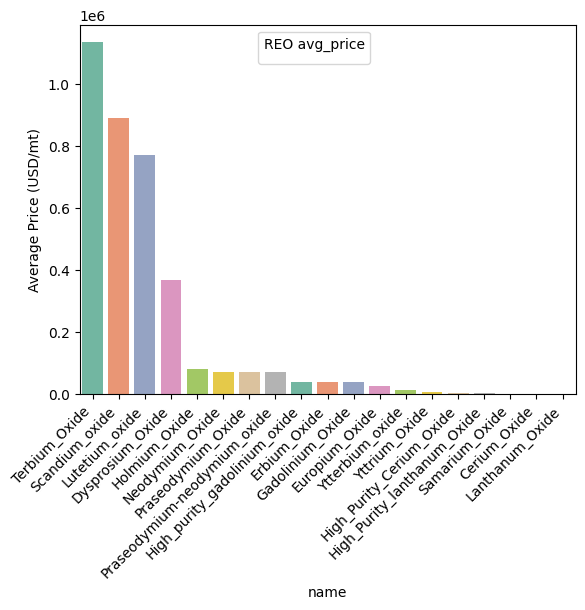

In [22]:
REO_prices =sns.barplot(y=rare_earth_df_sorted["average_price"],x=rare_earth_df_sorted["name"], palette="Set2",legend=False, data=rare_earth_df_sorted)
REO_prices.legend(loc='upper right', bbox_to_anchor=(0.6, 1), title="REO avg_price")
plt.ylabel("Average Price (USD/mt)")
REO_prices.set_xticklabels(REO_prices.get_xticklabels(), rotation=45, horizontalalignment='right');

Exporting the plot to images folder

In [23]:
REO_prices.figure.savefig("images/Reo_prices.jpg", dpi=1000)

## <u>QUESTION 2: NUMBER OF PROJECTS / CONTINENT</u>

In [24]:
df_re.head()

,Unnamed: 0,Project No.,Deposit No.,Company Name,Project Name,Location,Continent,Deposit type,"Resource (*10^4 t, REO, Total)",Grade (wt. %),Lanthanum_Oxide,Cerium_Oxide,Praseodymium_Oxide,Neodymium_Oxide,Samarium_Oxide,Europium_Oxide,Gadolinium_Oxide,Terbium_Oxide,Dysprosium_Oxide,Holmium_Oxide,Erbium_Oxide,Thulium_oxide,Ytterbium_oxide,Lutetium_oxide,Yttrium_Oxide,HREE percentage,REE pattern Ref.,Project and status Ref.,Deposit type Ref.,Resource and grade Ref.,Unnamed: 30
0,0,1,1.0,Lynas Rare Earths,Mount Weld,"Mount Weld, Australia",Australia,Carbonatite,300.00,5.40,24.112126,45.662100,5.073567,18.074581,2.524099,0.583460,1.293760,0.139523,0.481989,0.063420,0.139523,0.012684,0.063420,0.000000,1.775748,3.970066,"Paulick and Machacek ,2017","Lynas, Annual Report 2021, https://lynasrareea...","Lynas, Lynas Rare Earths Limited CLSA Explorat...","Lynas, Lynas Rare Earths Limited CLSA Explorat...",NaN
1,1,2,2.0,MP Materials,Mountain Pass,"Central Mojave Desert, California, America",North America,Carbonatite,418.30,8.90,33.201340,49.101432,4.294852,12.001218,0.807189,0.106610,0.197990,0.060920,0.045690,0.015230,0.015230,0.015230,0.015230,0.015230,0.106610,0.487359,"Paulick and Machacek ,2017",https://mpmaterials.com/about/,"Long, K.R., Van Gosen, B.S., Foley, N.K., and ...","Long, K.R., Van Gosen, B.S., Foley, N.K., and ...",NaN
2,2,3,3.0,Iluka Resources Limited,Eneabba,"Eneabba, Western Australia, Australia",Australia,Placer,7.29,0.09,23.335892,45.804518,4.063304,14.213534,2.502546,0.000000,1.597376,0.000000,0.909987,0.112745,0.478281,0.067454,0.439415,0.052036,6.422911,10.080206,"Jaireth et al., 2014, OGR","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...",NaN
3,3,4,4.0,NaN,WIM100 (Wimmera、Mallee),"Wimmera & Mallee,Western Australia, Australia",Australia,Placer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://iluka.com/operations-resource-developm...,https://iluka.com/operations-resource-developm...,NaN,NaN
4,4,5,5.0,Australian Strategic Materials,Dubbo (Toongi),"Dubbo, New South Wales, Australia",Australia,Alkaline rock,55.63,0.74,19.572553,36.895388,4.049494,14.173228,2.137233,0.112486,2.137233,0.337458,2.024747,0.337458,1.124859,0.112486,1.012373,0.112486,15.860517,23.059618,"Paulick, H., & Machacek, E. (2017). The global...",https://asm-au.com/dubbo-project-overview/reso...,"Spandler, C., & Morris, C. (2016). Geology and...","Australian Strategic Materials, Annual Report ...",NaN


In [25]:
len(df_re)

146

In [26]:
df_re.columns

Index(['Unnamed: 0', 'Project No.', 'Deposit No.', 'Company Name',
       'Project Name', 'Location', 'Continent', 'Deposit type',
       'Resource (*10^4 t, REO, Total)', 'Grade (wt. %)', 'Lanthanum_Oxide',
       'Cerium_Oxide', 'Praseodymium_Oxide', 'Neodymium_Oxide',
       'Samarium_Oxide', 'Europium_Oxide', 'Gadolinium_Oxide', 'Terbium_Oxide',
       'Dysprosium_Oxide', 'Holmium_Oxide', 'Erbium_Oxide', 'Thulium_oxide',
       'Ytterbium_oxide', 'Lutetium_oxide', 'Yttrium_Oxide', 'HREE percentage',
       'REE pattern Ref.', 'Project and status Ref.', 'Deposit type Ref.',
       'Resource and grade Ref.', 'Unnamed: 30'],
      dtype='object')

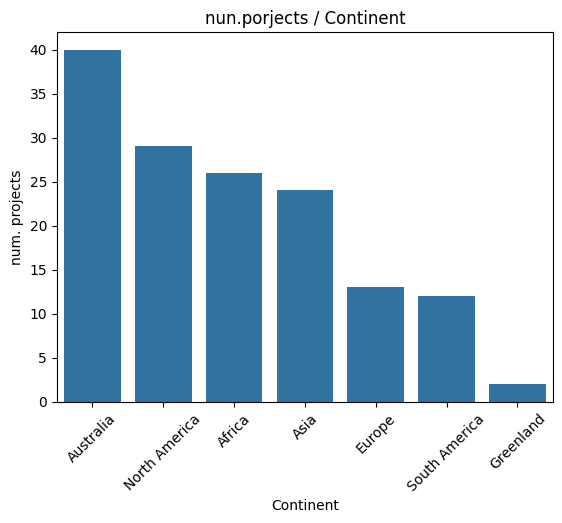

In [27]:
category_counts = df_re['Continent'].value_counts().index
df_re_cont = sns.countplot(x="Continent", data=df_re, order=category_counts,);
df_re_cont.set(xlabel='Continent', ylabel='num. projects')

# Set a title for the plot
plt.title('nun.porjects / Continent')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45);

In [28]:
plt.savefig('images/countplot.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## <u>QUESTION 3: </u>
### 3 MOST ABUNDANT REO IN 10 BIGGEST PROJECTS 
### 5 PROJECTS WITH THE HIGHES QTY OF THE MOST EXPENSIVE REO

In [29]:
# We must modify df_re to get a new columnn multipling the capacity of each project per the HEER content.
#for these questions NaN data in ROE content make no sense. We delate them as well as all Company name, location and Company
df_re.shape

(146, 31)

In [30]:
df_re=df_re.dropna(axis=0, how='all')

In [31]:
q3_df_re = df_re.drop(columns=['Company Name','Project Name','Unnamed: 0','Project No.','Deposit No.'])

In [32]:
q3_df_re.head()

,Location,Continent,Deposit type,"Resource (*10^4 t, REO, Total)",Grade (wt. %),Lanthanum_Oxide,Cerium_Oxide,Praseodymium_Oxide,Neodymium_Oxide,Samarium_Oxide,Europium_Oxide,Gadolinium_Oxide,Terbium_Oxide,Dysprosium_Oxide,Holmium_Oxide,Erbium_Oxide,Thulium_oxide,Ytterbium_oxide,Lutetium_oxide,Yttrium_Oxide,HREE percentage,REE pattern Ref.,Project and status Ref.,Deposit type Ref.,Resource and grade Ref.,Unnamed: 30
0,"Mount Weld, Australia",Australia,Carbonatite,300.00,5.40,24.112126,45.662100,5.073567,18.074581,2.524099,0.583460,1.293760,0.139523,0.481989,0.063420,0.139523,0.012684,0.063420,0.000000,1.775748,3.970066,"Paulick and Machacek ,2017","Lynas, Annual Report 2021, https://lynasrareea...","Lynas, Lynas Rare Earths Limited CLSA Explorat...","Lynas, Lynas Rare Earths Limited CLSA Explorat...",NaN
1,"Central Mojave Desert, California, America",North America,Carbonatite,418.30,8.90,33.201340,49.101432,4.294852,12.001218,0.807189,0.106610,0.197990,0.060920,0.045690,0.015230,0.015230,0.015230,0.015230,0.015230,0.106610,0.487359,"Paulick and Machacek ,2017",https://mpmaterials.com/about/,"Long, K.R., Van Gosen, B.S., Foley, N.K., and ...","Long, K.R., Van Gosen, B.S., Foley, N.K., and ...",NaN
2,"Eneabba, Western Australia, Australia",Australia,Placer,7.29,0.09,23.335892,45.804518,4.063304,14.213534,2.502546,0.000000,1.597376,0.000000,0.909987,0.112745,0.478281,0.067454,0.439415,0.052036,6.422911,10.080206,"Jaireth et al., 2014, OGR","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...",NaN
3,"Wimmera & Mallee,Western Australia, Australia",Australia,Placer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://iluka.com/operations-resource-developm...,https://iluka.com/operations-resource-developm...,NaN,NaN
4,"Dubbo, New South Wales, Australia",Australia,Alkaline rock,55.63,0.74,19.572553,36.895388,4.049494,14.173228,2.137233,0.112486,2.137233,0.337458,2.024747,0.337458,1.124859,0.112486,1.012373,0.112486,15.860517,23.059618,"Paulick, H., & Machacek, E. (2017). The global...",https://asm-au.com/dubbo-project-overview/reso...,"Spandler, C., & Morris, C. (2016). Geology and...","Australian Strategic Materials, Annual Report ...",NaN


In [33]:
q3_df_re['REO_qty']=(q3_df_re['Resource (*10^4 t, REO, Total)']*q3_df_re['Grade (wt. %)'])/100

In [34]:
q3_df_re.sample()

,Location,Continent,Deposit type,"Resource (*10^4 t, REO, Total)",Grade (wt. %),Lanthanum_Oxide,Cerium_Oxide,Praseodymium_Oxide,Neodymium_Oxide,Samarium_Oxide,Europium_Oxide,Gadolinium_Oxide,Terbium_Oxide,Dysprosium_Oxide,Holmium_Oxide,Erbium_Oxide,Thulium_oxide,Ytterbium_oxide,Lutetium_oxide,Yttrium_Oxide,HREE percentage,REE pattern Ref.,Project and status Ref.,Deposit type Ref.,Resource and grade Ref.,Unnamed: 30,REO_qty
69,Southeastern Malawi,Africa,Carbonatite,36.62,1.33,24.64455,44.617468,4.807041,16.384563,2.369668,0.541638,1.354096,0.13541,0.812458,0.13541,0.270819,0.067705,0.203114,0.0,3.65606,6.635071,"Paulick, H., & Machacek, E. (2017). The global...",NaN,https://www.mkango.ca/projects/songwe/,https://www.mkango.ca/projects/songwe/,NaN,0.487046


In [35]:
q3_df_re=q3_df_re.dropna(subset=["REO_qty"])

In [36]:
q3_df_re.columns

Index(['Location', 'Continent', 'Deposit type',
       'Resource (*10^4 t, REO, Total)', 'Grade (wt. %)', 'Lanthanum_Oxide',
       'Cerium_Oxide', 'Praseodymium_Oxide', 'Neodymium_Oxide',
       'Samarium_Oxide', 'Europium_Oxide', 'Gadolinium_Oxide', 'Terbium_Oxide',
       'Dysprosium_Oxide', 'Holmium_Oxide', 'Erbium_Oxide', 'Thulium_oxide',
       'Ytterbium_oxide', 'Lutetium_oxide', 'Yttrium_Oxide', 'HREE percentage',
       'REE pattern Ref.', 'Project and status Ref.', 'Deposit type Ref.',
       'Resource and grade Ref.', 'Unnamed: 30', 'REO_qty'],
      dtype='object')

In [37]:
q3_1_subset=q3_df_re[['Location','Lanthanum_Oxide',
       'Cerium_Oxide', 'Praseodymium_Oxide', 'Neodymium_Oxide',
       'Samarium_Oxide', 'Europium_Oxide', 'Gadolinium_Oxide', 'Terbium_Oxide',
       'Dysprosium_Oxide', 'Holmium_Oxide', 'Erbium_Oxide', 'Thulium_oxide',
       'Ytterbium_oxide', 'Lutetium_oxide', 'Yttrium_Oxide', 'REO_qty']].sort_values(by='REO_qty', ascending=False).head(10)

In [38]:
q3_1_subset

,Location,Lanthanum_Oxide,Cerium_Oxide,Praseodymium_Oxide,Neodymium_Oxide,Samarium_Oxide,Europium_Oxide,Gadolinium_Oxide,Terbium_Oxide,Dysprosium_Oxide,Holmium_Oxide,Erbium_Oxide,Thulium_oxide,Ytterbium_oxide,Lutetium_oxide,Yttrium_Oxide,REO_qty
139,China,25.000000,50.070000,5.100000,16.600000,1.200000,0.180000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,560.000000
89,"Sakha Republic (Yakutia), Russia",23.260000,45.510000,4.570000,15.210000,1.810000,0.530000,1.440000,0.190000,0.990000,0.180000,0.430000,0.050000,0.410000,0.050000,5.360000,38.762471
1,"Central Mojave Desert, California, America",33.201340,49.101432,4.294852,12.001218,0.807189,0.106610,0.197990,0.060920,0.045690,0.015230,0.015230,0.015230,0.015230,0.015230,0.106610,37.228700
118,"Goiás, Brazil",34.420000,50.220000,3.690000,10.700000,0.450000,0.210000,0.120000,0.000000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.997500
112,South Australia,36.360000,57.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.610775
81,"Lai Chau, Vietnam",34.620000,46.880000,4.140000,11.550000,1.240000,0.620000,0.570000,0.070000,0.180000,0.030000,0.060000,0.010000,0.030000,0.004000,0.000000,31.700000
10,"Kujalleq, Greenland",17.737003,33.180428,3.211009,12.232416,2.293578,0.305810,2.599388,0.458716,2.905199,0.611621,2.446483,0.305810,1.987768,0.305810,19.418960,17.893000
0,"Mount Weld, Australia",24.112126,45.662100,5.073567,18.074581,2.524099,0.583460,1.293760,0.139523,0.481989,0.063420,0.139523,0.012684,0.063420,0.000000,1.775748,16.200000
99,"Krasnoyarsk, Russia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.399174
5,"Narsaq, Greenland",27.685185,42.407407,4.074074,12.407407,1.574074,0.092593,1.111111,0.185185,1.111111,0.185185,0.555556,0.092593,0.462963,0.185185,7.870370,12.254000


In [39]:
criteria = q3_1_subset['Location'] == 'South Australia'
row_index = q3_1_subset[criteria].index[0]

print(f"The index of the row is {row_index}")

The index of the row is 112


In [40]:
#in index 118 we have two values very important and several to NaN so we will change NaN=0 in that row
q3_1_subset.loc[112] = q3_1_subset.loc[112].fillna(0)

In [41]:
q3_1_subset

,Location,Lanthanum_Oxide,Cerium_Oxide,Praseodymium_Oxide,Neodymium_Oxide,Samarium_Oxide,Europium_Oxide,Gadolinium_Oxide,Terbium_Oxide,Dysprosium_Oxide,Holmium_Oxide,Erbium_Oxide,Thulium_oxide,Ytterbium_oxide,Lutetium_oxide,Yttrium_Oxide,REO_qty
139,China,25.000000,50.070000,5.100000,16.600000,1.200000,0.180000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,560.000000
89,"Sakha Republic (Yakutia), Russia",23.260000,45.510000,4.570000,15.210000,1.810000,0.530000,1.440000,0.190000,0.990000,0.180000,0.430000,0.050000,0.410000,0.050000,5.360000,38.762471
1,"Central Mojave Desert, California, America",33.201340,49.101432,4.294852,12.001218,0.807189,0.106610,0.197990,0.060920,0.045690,0.015230,0.015230,0.015230,0.015230,0.015230,0.106610,37.228700
118,"Goiás, Brazil",34.420000,50.220000,3.690000,10.700000,0.450000,0.210000,0.120000,0.000000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.997500
112,South Australia,36.360000,57.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.610775
81,"Lai Chau, Vietnam",34.620000,46.880000,4.140000,11.550000,1.240000,0.620000,0.570000,0.070000,0.180000,0.030000,0.060000,0.010000,0.030000,0.004000,0.000000,31.700000
10,"Kujalleq, Greenland",17.737003,33.180428,3.211009,12.232416,2.293578,0.305810,2.599388,0.458716,2.905199,0.611621,2.446483,0.305810,1.987768,0.305810,19.418960,17.893000
0,"Mount Weld, Australia",24.112126,45.662100,5.073567,18.074581,2.524099,0.583460,1.293760,0.139523,0.481989,0.063420,0.139523,0.012684,0.063420,0.000000,1.775748,16.200000
99,"Krasnoyarsk, Russia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.399174
5,"Narsaq, Greenland",27.685185,42.407407,4.074074,12.407407,1.574074,0.092593,1.111111,0.185185,1.111111,0.185185,0.555556,0.092593,0.462963,0.185185,7.870370,12.254000


In [42]:
#we can see the highest qty correspond two 3 main elements. We subset just those three an create a new subset
q3_1_answer=q3_1_subset[['Location','Lanthanum_Oxide','Cerium_Oxide','Neodymium_Oxide','REO_qty']]

In [43]:
q3_1_answer

,Location,Lanthanum_Oxide,Cerium_Oxide,Neodymium_Oxide,REO_qty
139,China,25.000000,50.070000,16.600000,560.000000
89,"Sakha Republic (Yakutia), Russia",23.260000,45.510000,15.210000,38.762471
1,"Central Mojave Desert, California, America",33.201340,49.101432,12.001218,37.228700
118,"Goiás, Brazil",34.420000,50.220000,10.700000,35.997500
112,South Australia,36.360000,57.200000,0.000000,33.610775
81,"Lai Chau, Vietnam",34.620000,46.880000,11.550000,31.700000
10,"Kujalleq, Greenland",17.737003,33.180428,12.232416,17.893000
0,"Mount Weld, Australia",24.112126,45.662100,18.074581,16.200000
99,"Krasnoyarsk, Russia",NaN,NaN,NaN,15.399174
5,"Narsaq, Greenland",27.685185,42.407407,12.407407,12.254000


 <u> To answer the second question we must look just to the 3 more expensive REO (. We then will create a new subset with 
 these REO and then get the 5 projects with the biggest quantity of these REO.</u>

In [44]:
q3_2_subset = q3_1_subset[['Location','Terbium_Oxide','Samarium_Oxide','Lutetium_oxide']]
q3_2_subset.sample()

,Location,Terbium_Oxide,Samarium_Oxide,Lutetium_oxide
99,"Krasnoyarsk, Russia",NaN,NaN,NaN


In [45]:
q3_2_subset['most_ex_REO_total'] =q3_2_subset['Lutetium_oxide']+q3_2_subset['Terbium_Oxide']+q3_2_subset['Samarium_Oxide']

C:\Users\psaez\AppData\Local\Temp\ipykernel_7256\2631066965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2_subset['most_ex_REO_total'] =q3_2_subset['Lutetium_oxide']+q3_2_subset['Terbium_Oxide']+q3_2_subset['Samarium_Oxide']


In [46]:
q3_2_subset.sample()

,Location,Terbium_Oxide,Samarium_Oxide,Lutetium_oxide,most_ex_REO_total
89,"Sakha Republic (Yakutia), Russia",0.19,1.81,0.05,2.05


In [47]:
q3_2_answer=q3_2_subset.sort_values(by='most_ex_REO_total', ascending=False).head(5)

In [48]:
q3_2_answer

,Location,Terbium_Oxide,Samarium_Oxide,Lutetium_oxide,most_ex_REO_total
10,"Kujalleq, Greenland",0.458716,2.293578,0.305810,3.058104
0,"Mount Weld, Australia",0.139523,2.524099,0.000000,2.663623
89,"Sakha Republic (Yakutia), Russia",0.190000,1.810000,0.050000,2.050000
5,"Narsaq, Greenland",0.185185,1.574074,0.185185,1.944444
81,"Lai Chau, Vietnam",0.070000,1.240000,0.004000,1.314000


Text(0.5, 1.0, "Projects with highest qty of 'top' REO")

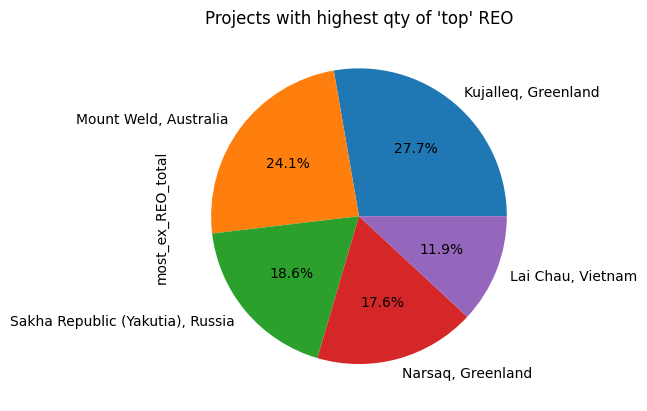

In [51]:
labels = q3_2_answer["Location"]
title = "Projects with highest qty of 'top' REO"
q3_2_plot.plot.pie(autopct="%.1f%%", labels=labels)
plt.title(title)